# Sales & Demand Forecasting for Businesses

**Machine Learning Task 1 – Future Interns (2026)**


---


## Project Context

Sales forecasting is a critical business function used to plan inventory, manage cash flow,
prepare staffing, and avoid overstocking or losses.

In this project, we build a machine learning-based sales forecasting system using historical
business data to support real-world decision-making.


---

##  Objective

The objective of this task is to predict future sales based on historical data and present
the results in a clear, business-friendly way.

Beyond prediction accuracy, this project focuses on:
- Preparing time-based data
- Understanding trends and seasonality
- Explaining how forecasts support business planning

---

## Tools & Libraries Used

- Python
- Jupyter Notebook
- Pandas
- NumPy
- Scikit-learn
- Matplotlib


## Data Overview

The dataset contains historical sales data aggregated at a monthly level.
Each record represents total sales for a given month and year.

Key columns used in this project:
- Year: calendar year of the sales record
- Month: month of the year (1–12)
- Sales: total sales amount for the given period


In [31]:
# Core data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


In [32]:
file_path = "../data/superstore.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Display the first rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [33]:
# Basic information about the dataset
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   str    
 2   Order Date     9994 non-null   str    
 3   Ship Date      9994 non-null   str    
 4   Ship Mode      9994 non-null   str    
 5   Customer ID    9994 non-null   str    
 6   Customer Name  9994 non-null   str    
 7   Segment        9994 non-null   str    
 8   Country        9994 non-null   str    
 9   City           9994 non-null   str    
 10  State          9994 non-null   str    
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   str    
 13  Product ID     9994 non-null   str    
 14  Category       9994 non-null   str    
 15  Sub-Category   9994 non-null   str    
 16  Product Name   9994 non-null   str    
 17  Sales          9994 non-null   float64
 18  Quantity       9994

In [34]:
# Convert Order Date to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Check the result
df["Order Date"].head()


0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: Order Date, dtype: datetime64[us]

In [35]:
# Create a Year-Month column
df["YearMonth"] = df["Order Date"].dt.to_period("M")

# Aggregate monthly sales
monthly_sales = (
    df.groupby("YearMonth")["Sales"]
    .sum()
    .reset_index()
)

# Convert Period to timestamp for plotting
monthly_sales["YearMonth"] = monthly_sales["YearMonth"].dt.to_timestamp()

monthly_sales.head()


,YearMonth,Sales
0,2014-01-01,14236.895
1,2014-02-01,4519.892
2,2014-03-01,55691.009
3,2014-04-01,28295.345
4,2014-05-01,23648.287


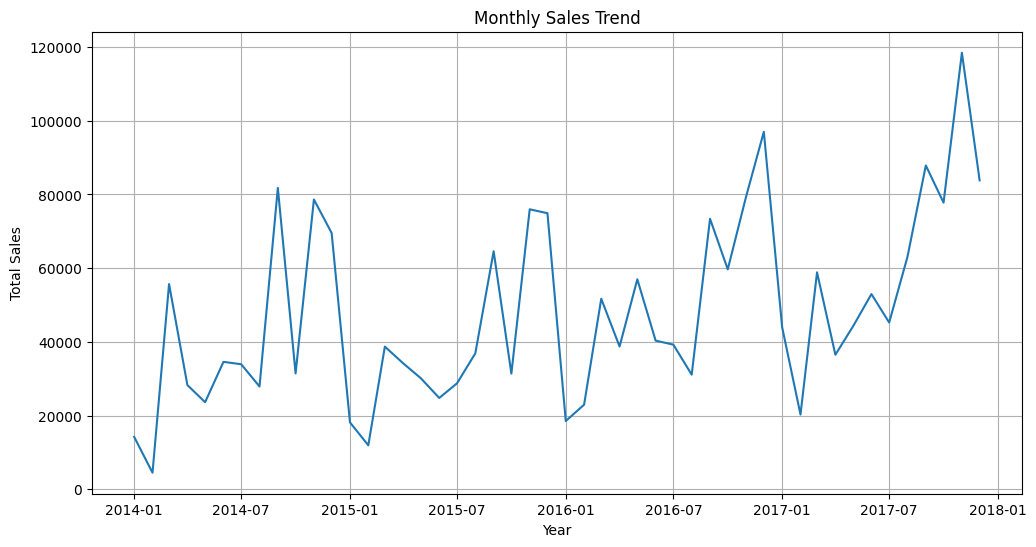

In [36]:
# Plot monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["YearMonth"], monthly_sales["Sales"])
plt.title("Monthly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [37]:
# Create time-based features
monthly_sales["Year"] = monthly_sales["YearMonth"].dt.year
monthly_sales["Month"] = monthly_sales["YearMonth"].dt.month

monthly_sales.head()


,YearMonth,Sales,Year,Month
0,2014-01-01,14236.895,2014,1
1,2014-02-01,4519.892,2014,2
2,2014-03-01,55691.009,2014,3
3,2014-04-01,28295.345,2014,4
4,2014-05-01,23648.287,2014,5


In [38]:
monthly_sales[["Year", "Month", "Sales"]].head()


,Year,Month,Sales
0,2014,1,14236.895
1,2014,2,4519.892
2,2014,3,55691.009
3,2014,4,28295.345
4,2014,5,23648.287


In [39]:
from sklearn.model_selection import train_test_split

X = monthly_sales[['Year', 'Month']]
y = monthly_sales['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=False
)

X_train.shape, X_test.shape


((38, 2), (10, 2))

In [40]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [41]:
# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred[:5]


array([37577.3681398 , 42433.54956466, 47289.73098951, 52145.91241437,
       57002.09383922])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


(11599.752647028372, np.float64(17017.193217903026))

In [43]:
# Create future dates (next 6 months)
last_year = monthly_sales["Year"].iloc[-1]
last_month = monthly_sales["Month"].iloc[-1]

future_months = []
year = last_year
month = last_month

for _ in range(6):
    month += 1
    if month > 12:
        month = 1
        year += 1
    future_months.append([year, month])

future_X = pd.DataFrame(future_months, columns=["Year", "Month"])

future_X


,Year,Month
0,2018,1
1,2018,2
2,2018,3
3,2018,4
4,2018,5
5,2018,6


In [44]:
# Predict future sales
future_sales_pred = model.predict(future_X)

future_sales_pred


array([33378.78573551, 38234.96716036, 43091.14858522, 47947.33001007,
       52803.51143493, 57659.69285978])

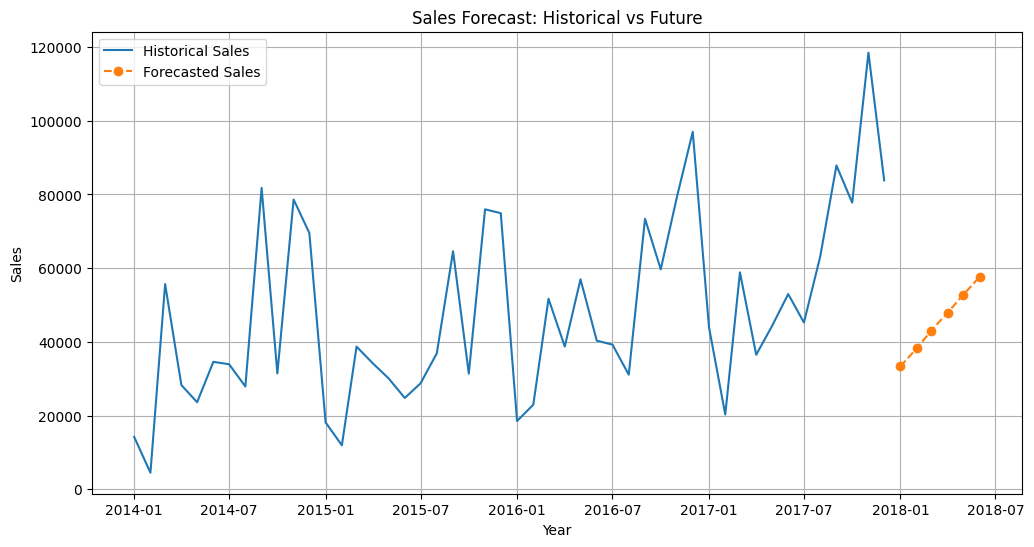

In [45]:
# Create dates for future predictions
future_dates = pd.date_range(
    start=monthly_sales["YearMonth"].iloc[-1] + pd.offsets.MonthBegin(),
    periods=6,
    freq="MS"
)

# Plot historical sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["YearMonth"], monthly_sales["Sales"], label="Historical Sales")

# Plot future sales predictions
plt.plot(future_dates, future_sales_pred, 
         linestyle="--", marker="o", label="Forecasted Sales")

plt.title("Sales Forecast: Historical vs Future")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


## 📊 Business Insights & Conclusion

### 🔍 Model Performance Summary
The forecasting model was trained using historical monthly sales data.
To evaluate its performance, we used standard regression metrics:

- **Mean Absolute Error (MAE):** ~11,600
- **Root Mean Squared Error (RMSE):** ~17,000

This means that, on average, the model's monthly sales predictions deviate
by approximately 11,600 units from actual sales.

---

### 📈 Sales Forecast Interpretation
Based on historical trends and seasonality patterns, the model predicts a
**gradual increase in sales over the next 6 months**.

This forecast suggests:
- steady business growth
- increasing demand in the near future
- predictable seasonal behavior

---

### 🏢 Business Value
This sales forecast can help a business to:
- plan inventory more efficiently
- optimize staffing levels
- anticipate cash flow needs
- reduce the risk of overstocking or shortages

While the model is relatively simple, it provides **clear and actionable insights**
that can support real-world business decision-making.
